# IOD Mini Project 3: House Price Prediction
## Purpose:
- Indicate house buyers to know the price range of their dream house
- Provide property investors to understand the trend of housing prices
- Help developers to determine the selling price range of a house

### Import Library

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import BaggingClassifier

from mlxtend.plotting import plot_learning_curves

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
pd.set_option('display.max_columns',100)
# Train Data
data =pd.read_csv('/Users/maxkim/Desktop/DS Camp/DS Script/Dataset/Mini Project 3/train.csv', index_col =0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Test Data
test_data =pd.read_csv('/Users/maxkim/Desktop/DS Camp/DS Script/Dataset/Mini Project 3/test.csv', index_col =0)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print(data.shape)
print(test_data.shape)

(1460, 80)
(1459, 79)


In [5]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
def show_scatterplot(data, x, y, title, xlabel, ylabel):
    
    # Styling
    plt.figure(figsize = (10,6))
    plt.style.use('seaborn-white')
    
    # plot
    sns.scatterplot(x = x, y = y,
                   data = data, palette = 'mako')
    
    # Labelling
    plt.title(title, fontsize = 18)
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12)
    
    # grid
    plt.grid(alpha = 0.6)
    
    # Show
    plt.show()

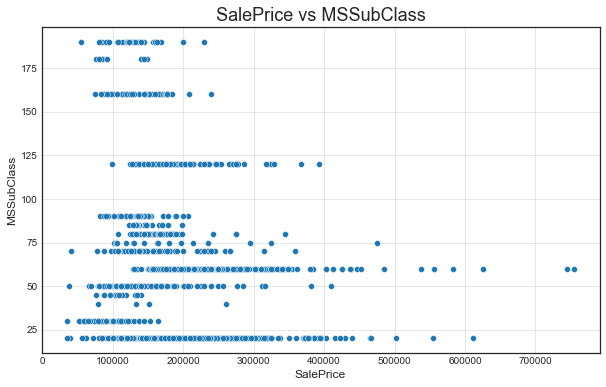

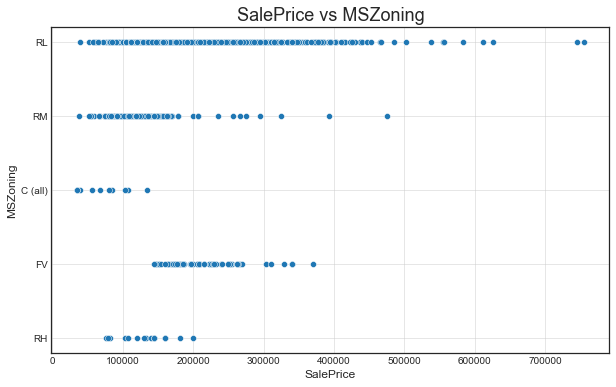

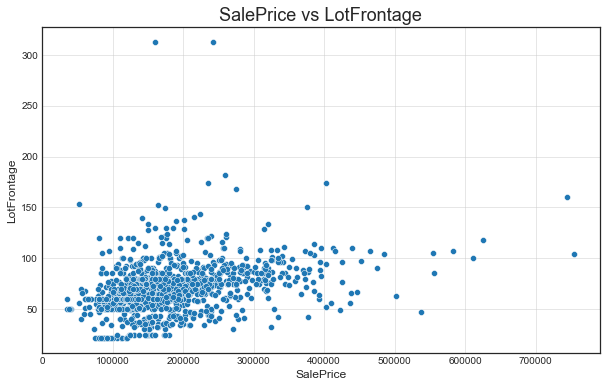

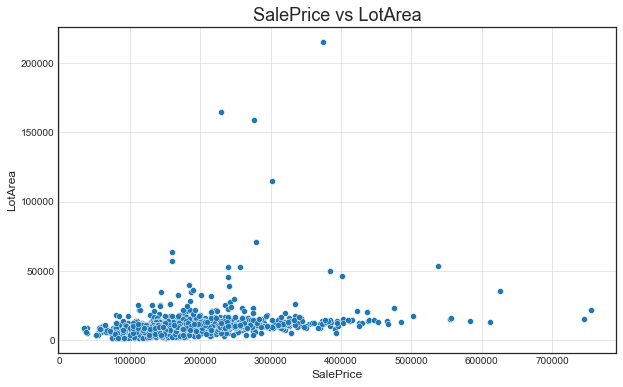

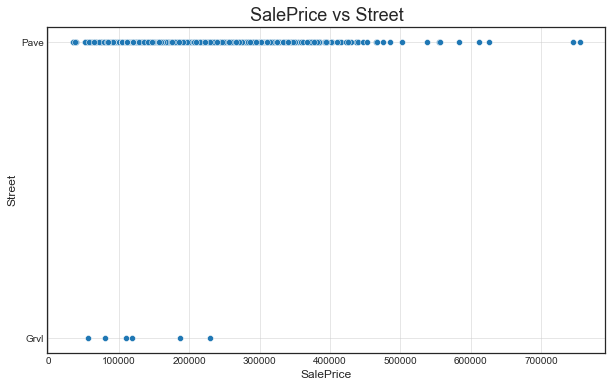

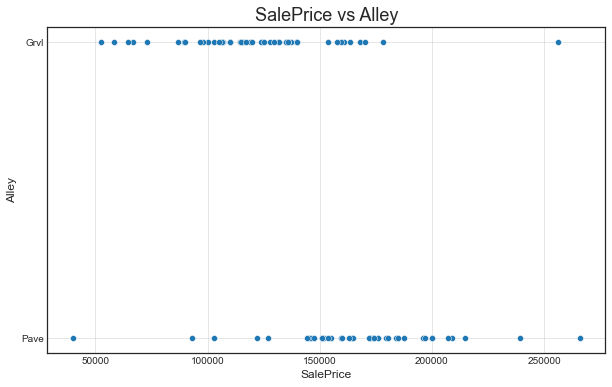

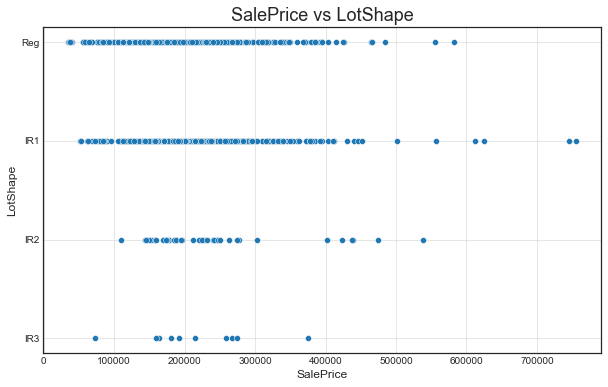

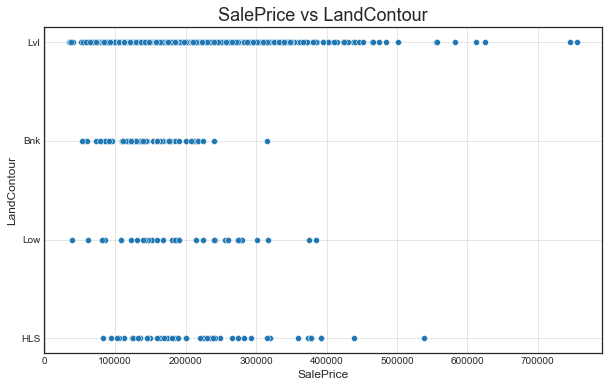

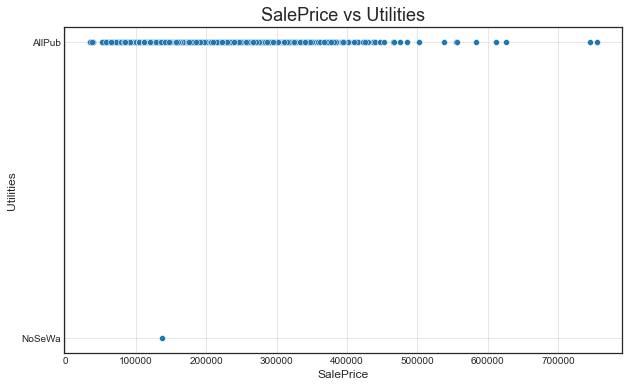

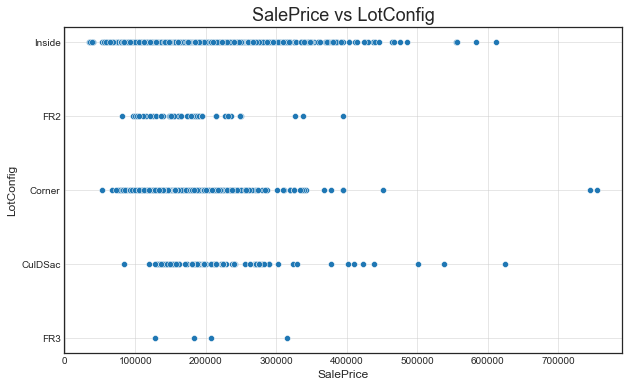

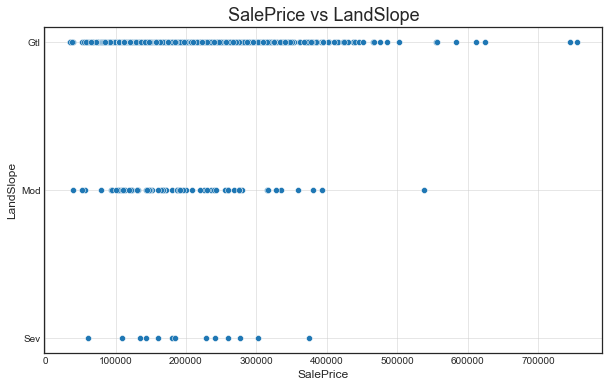

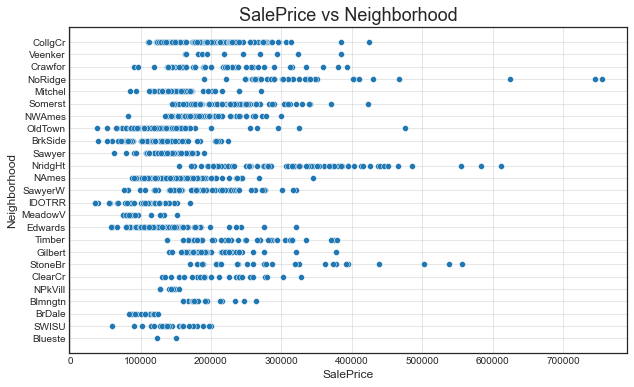

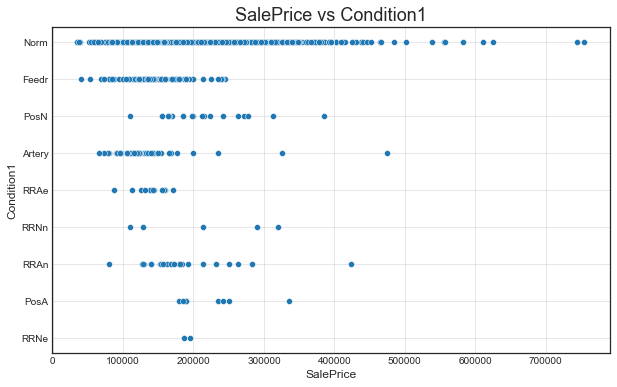

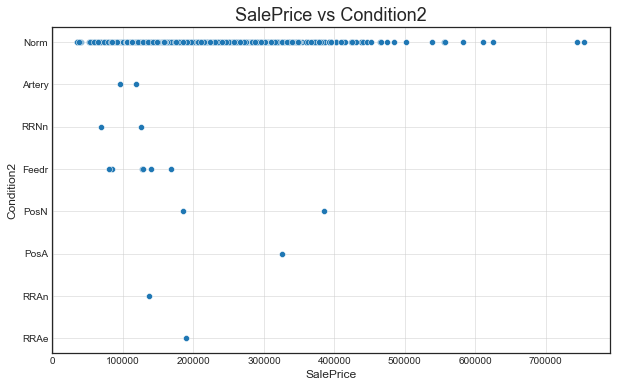

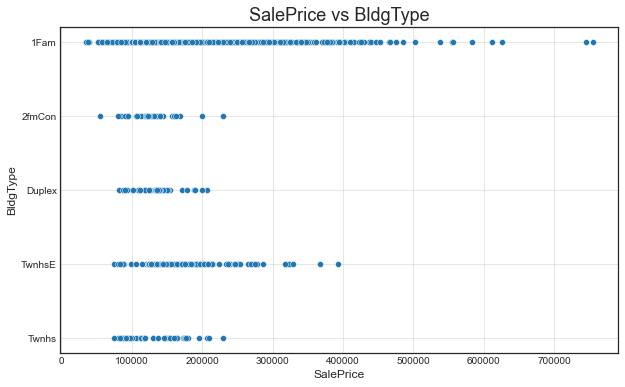

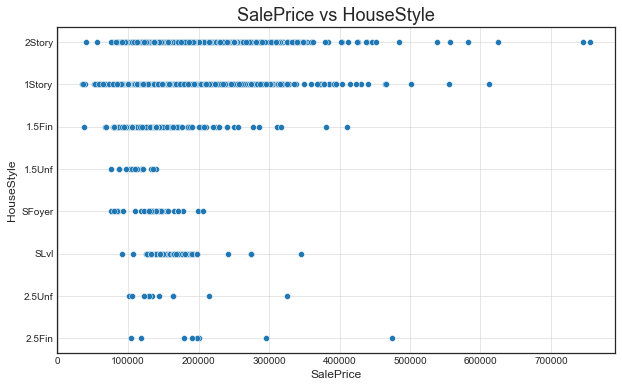

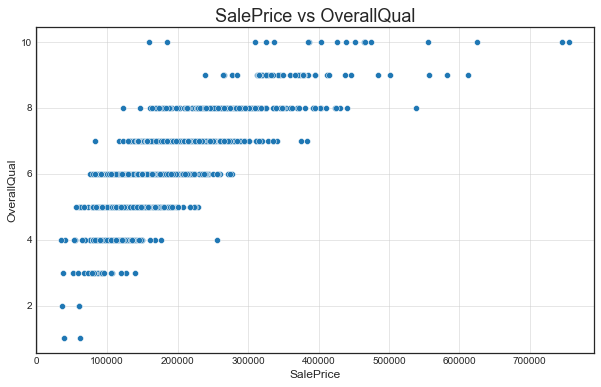

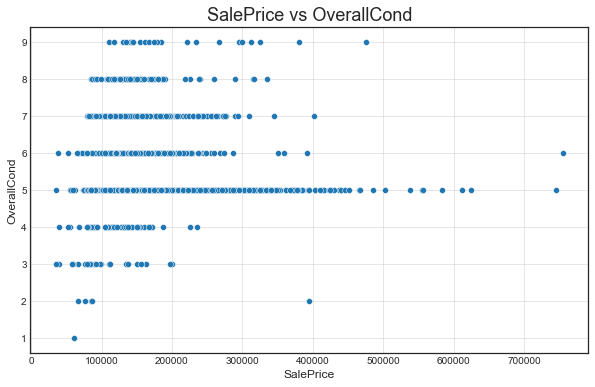

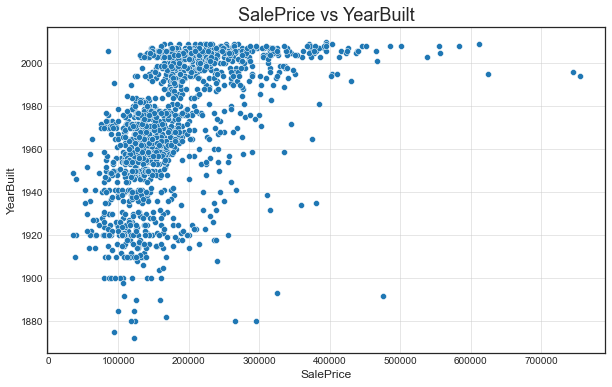

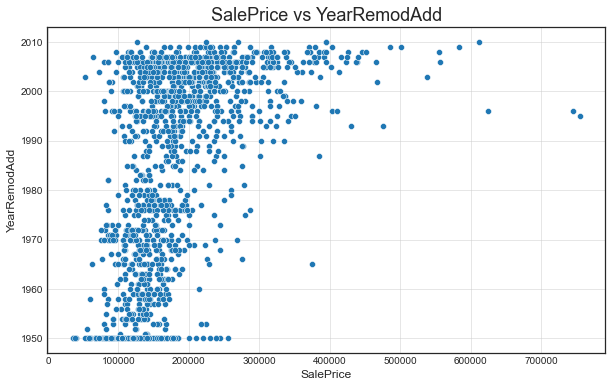

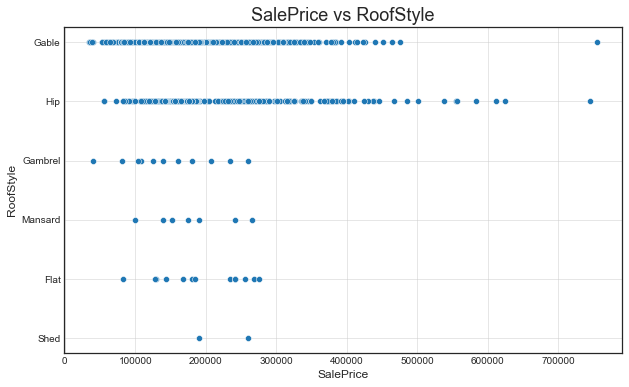

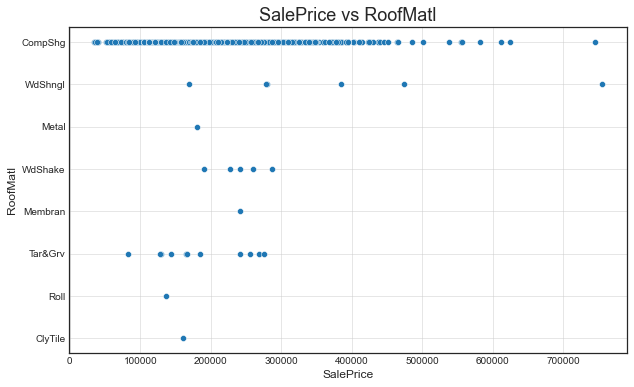

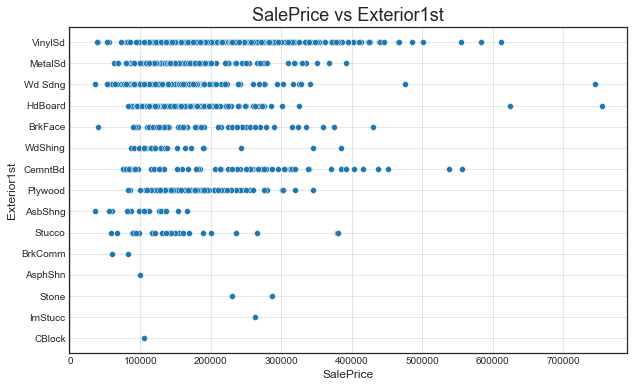

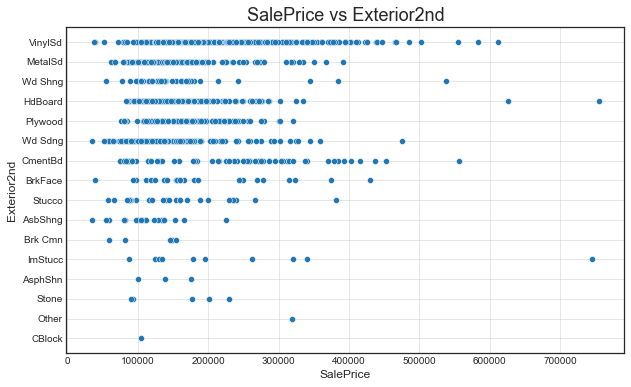

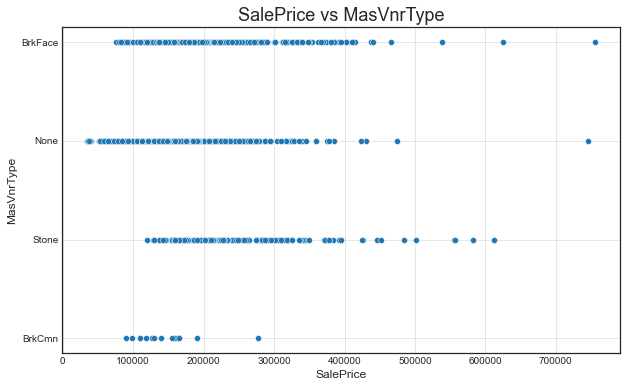

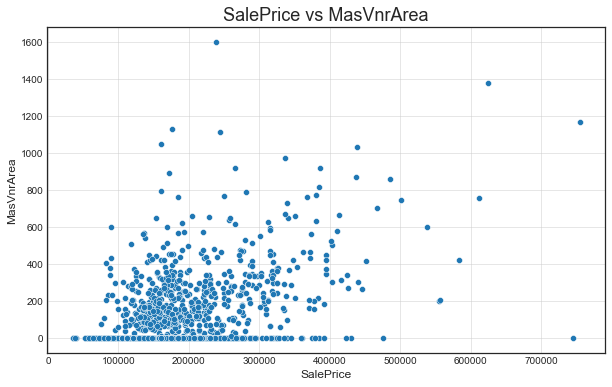

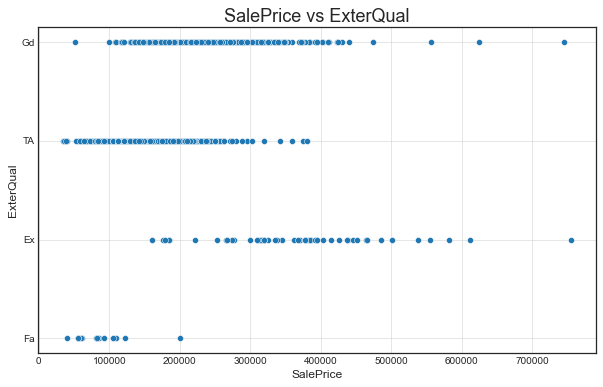

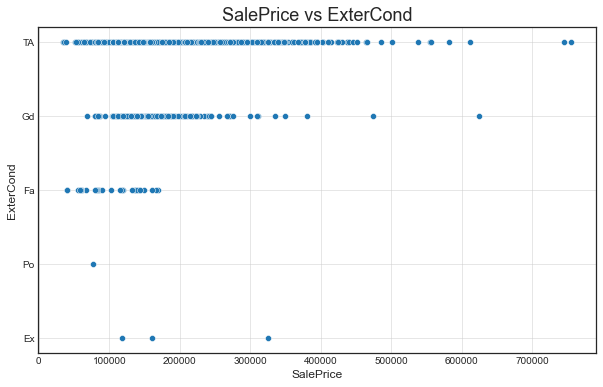

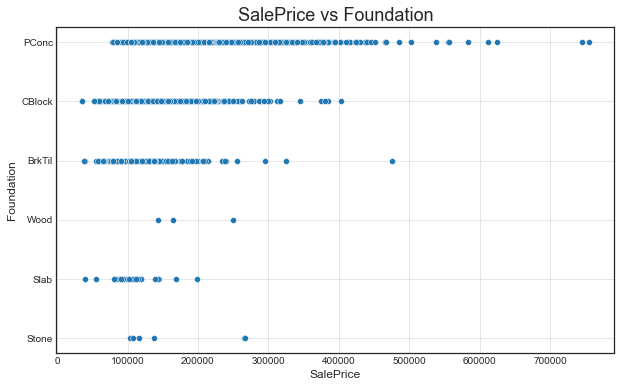

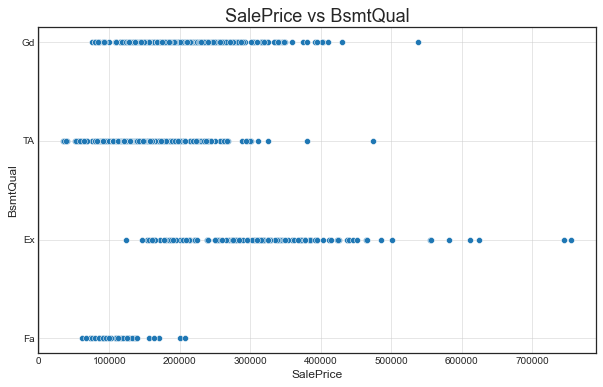

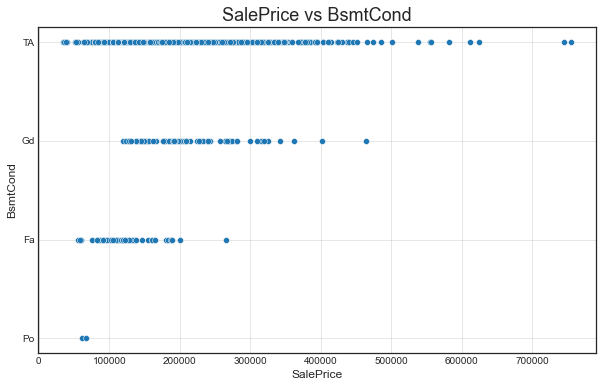

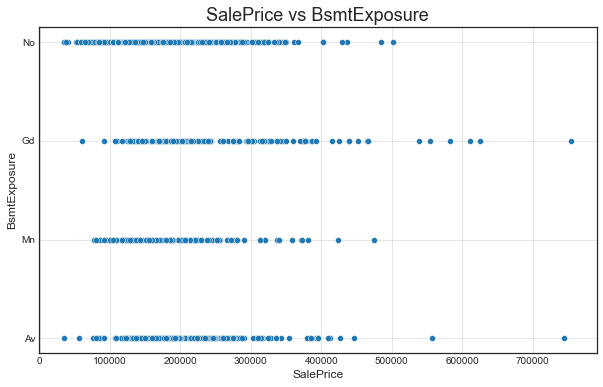

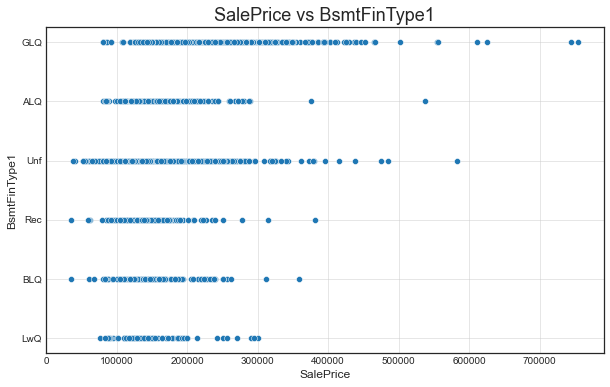

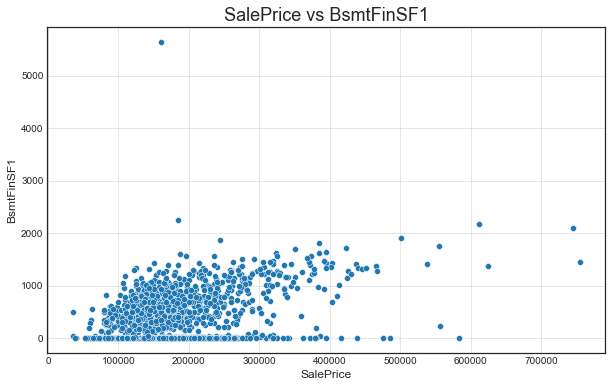

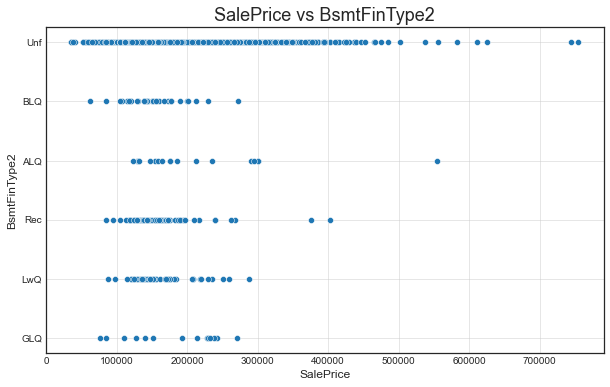

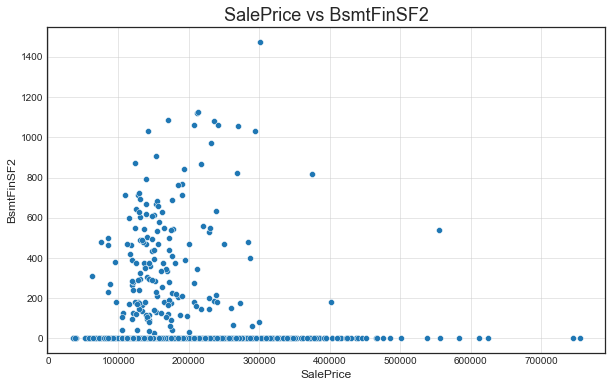

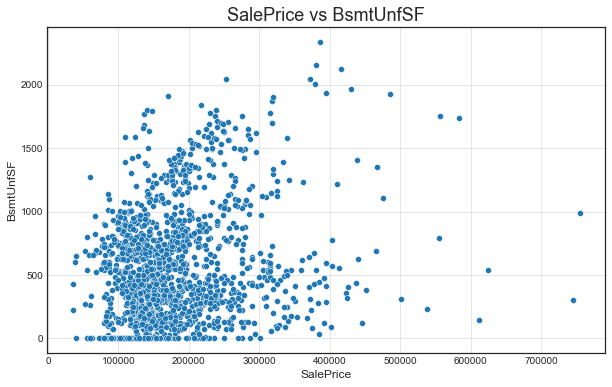

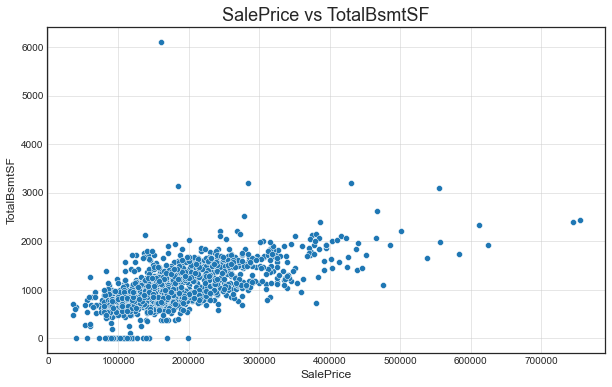

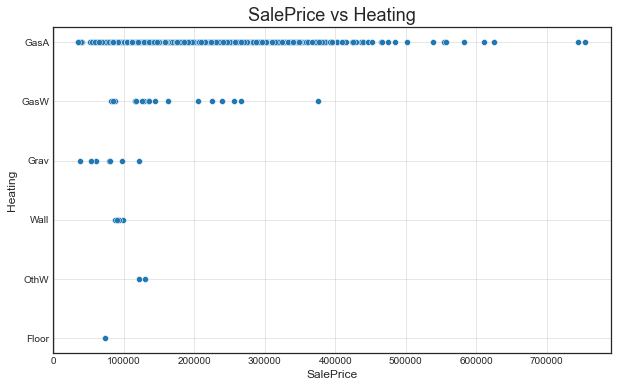

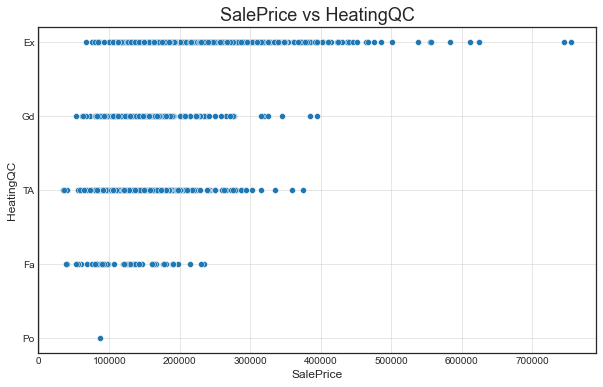

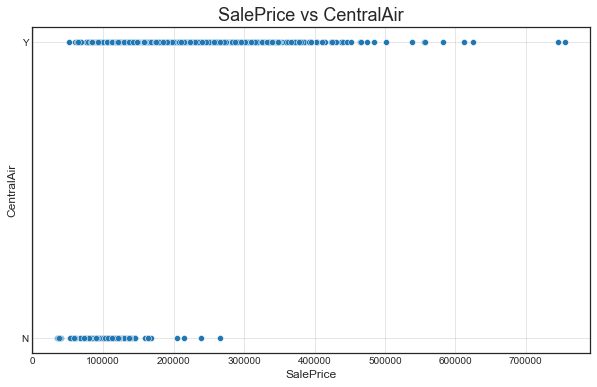

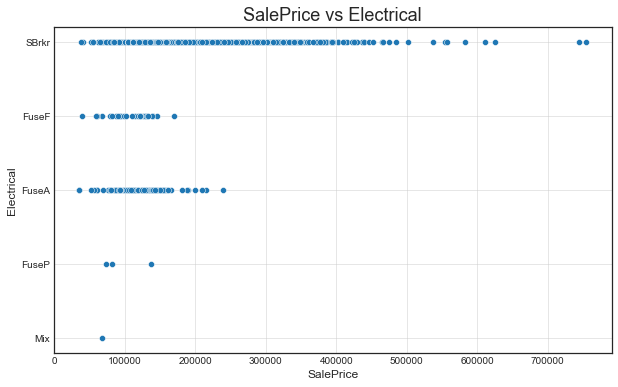

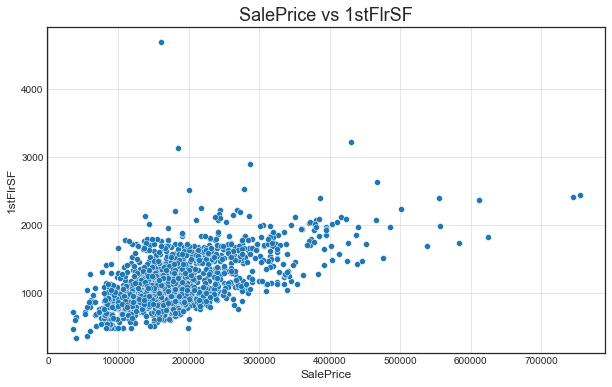

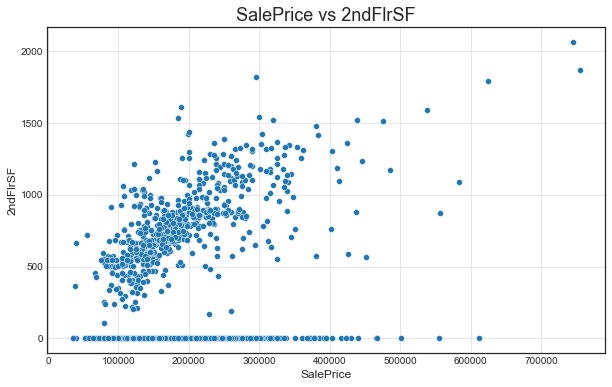

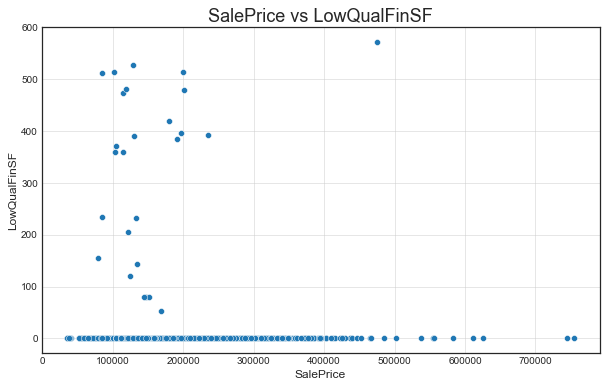

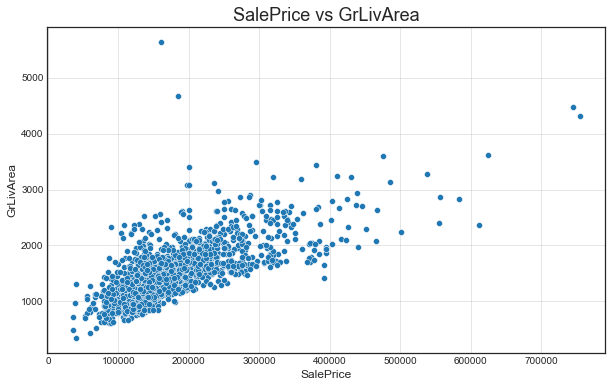

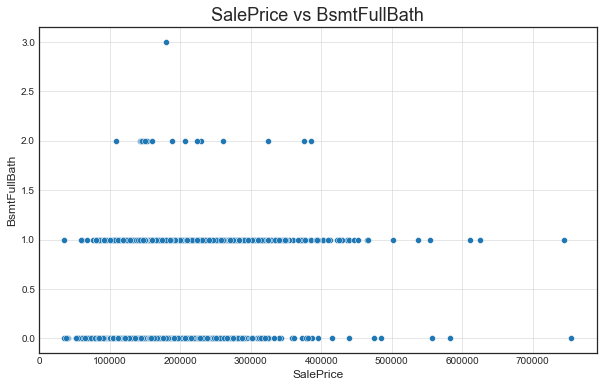

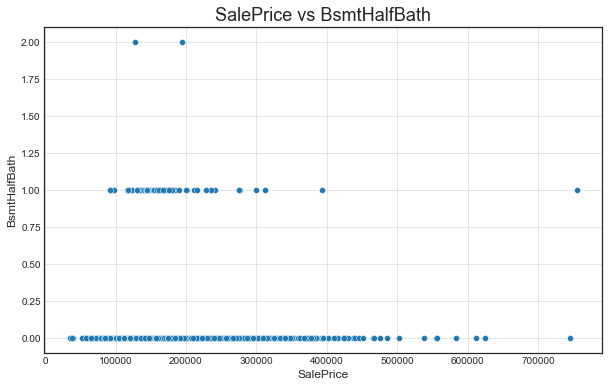

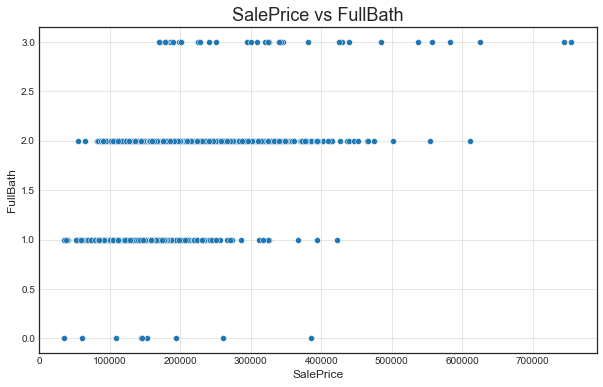

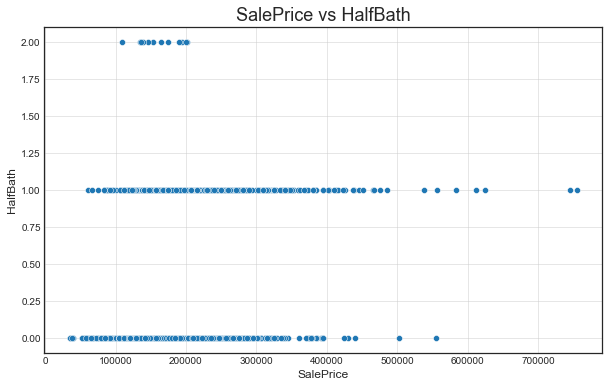

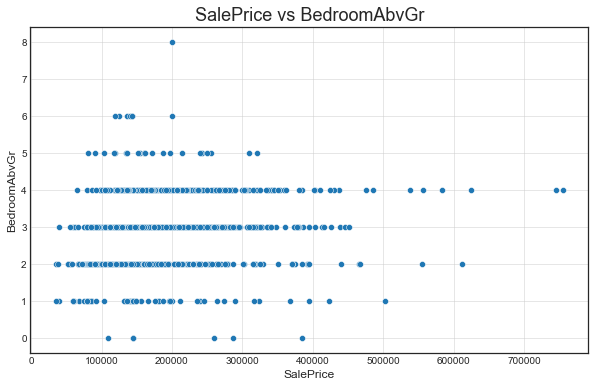

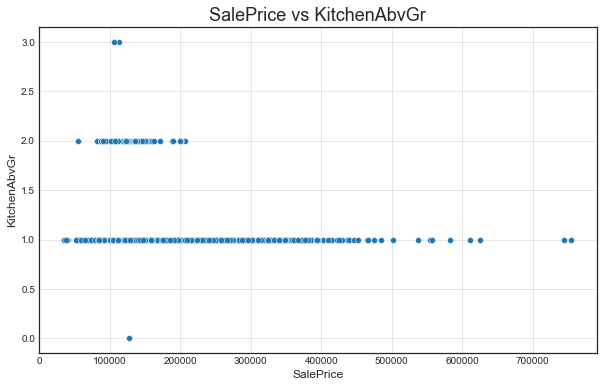

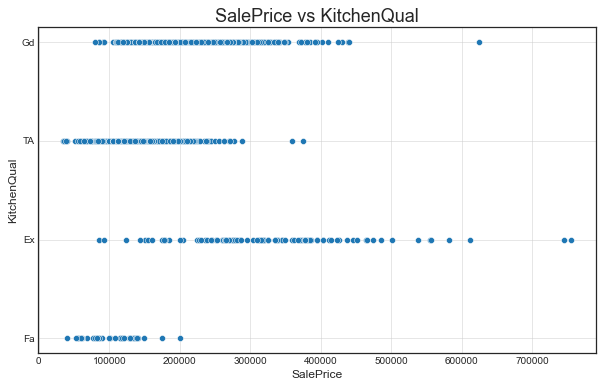

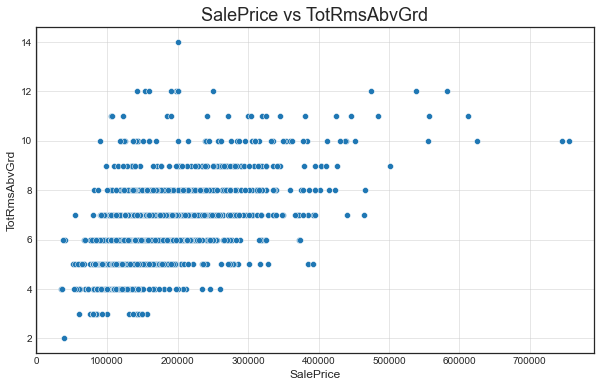

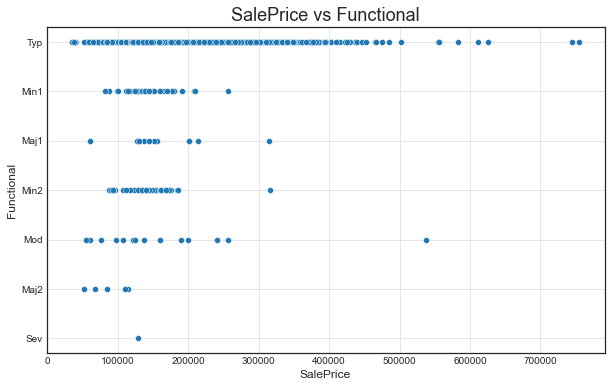

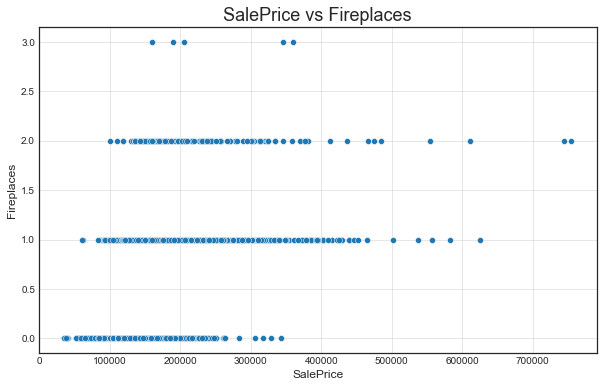

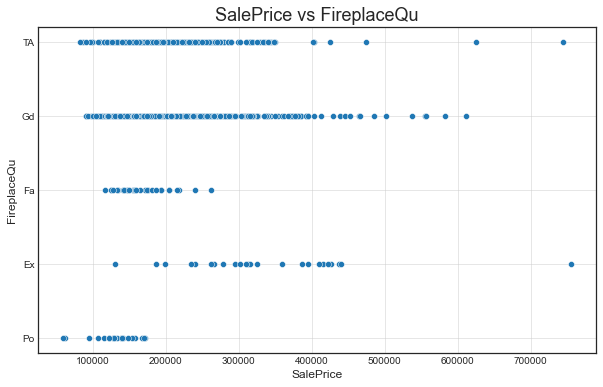

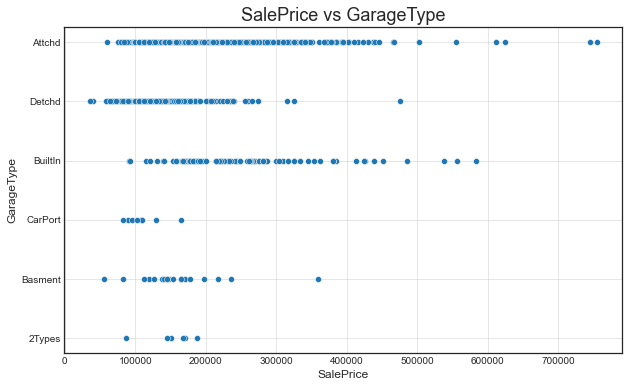

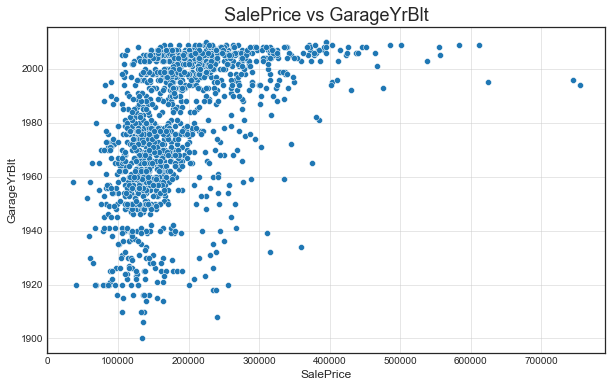

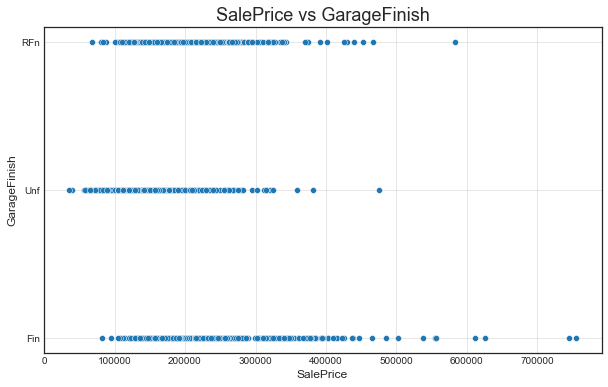

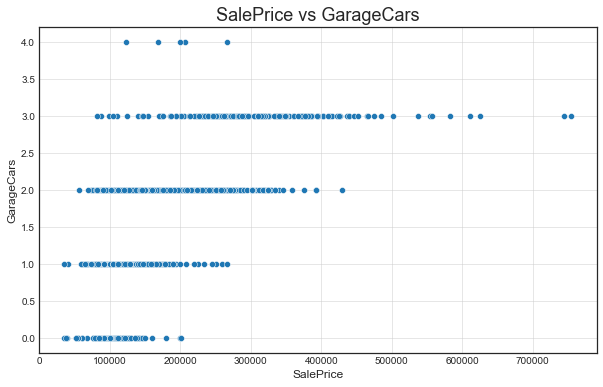

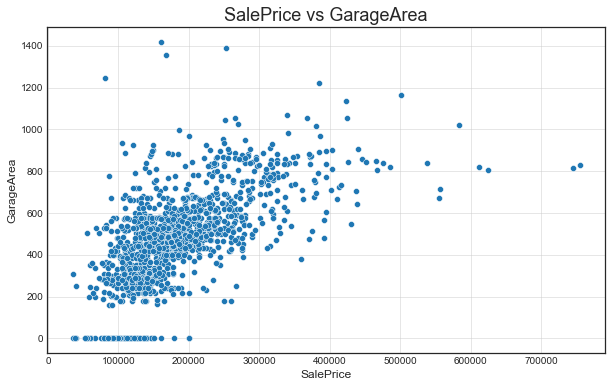

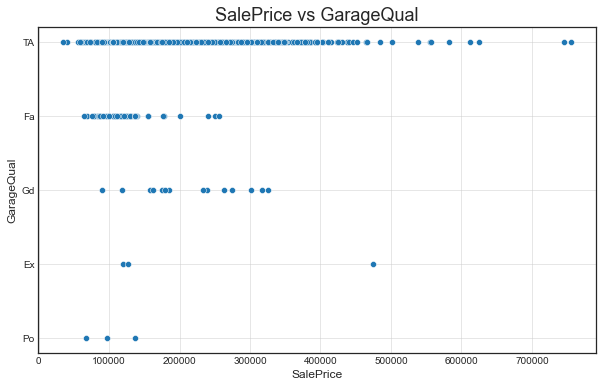

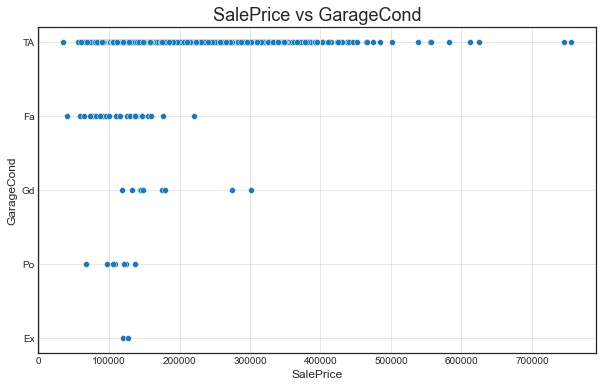

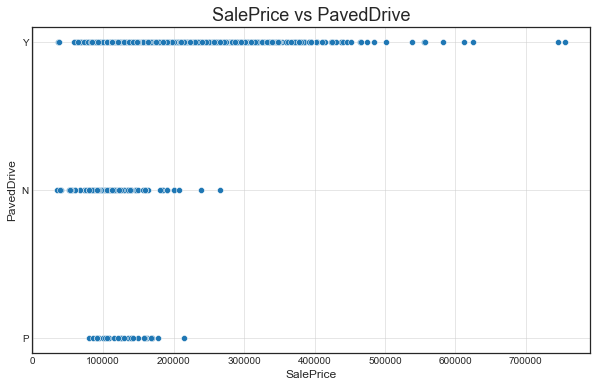

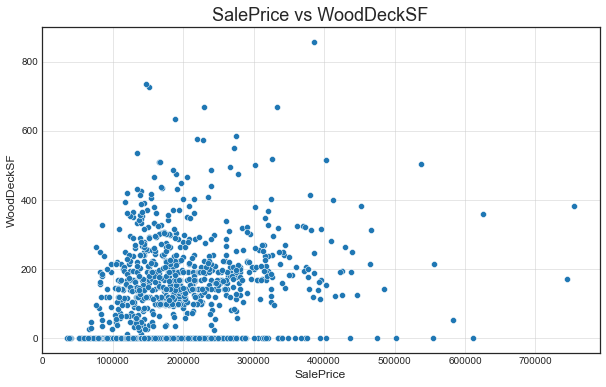

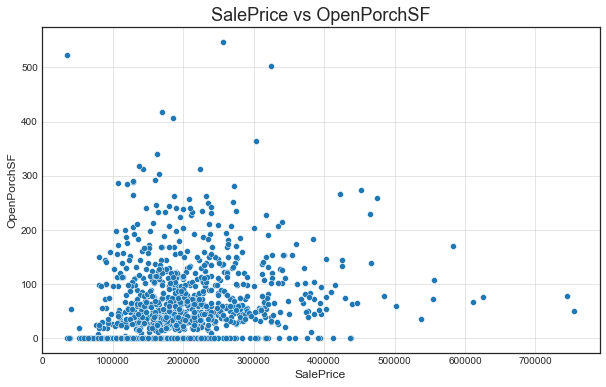

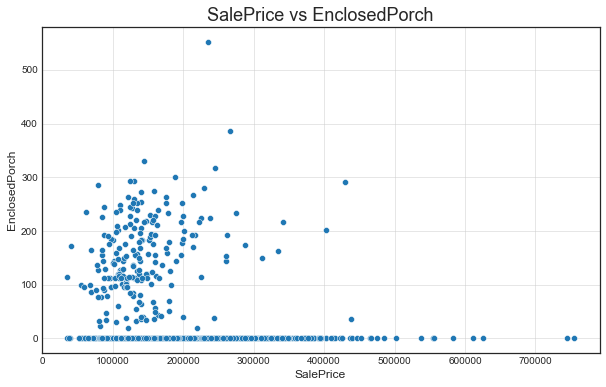

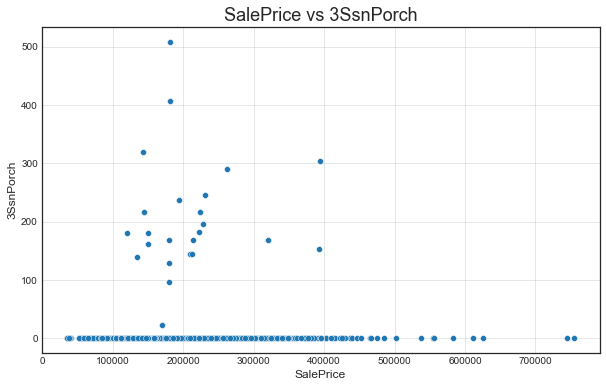

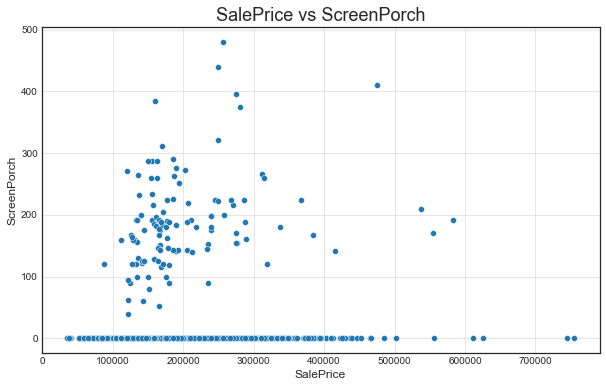

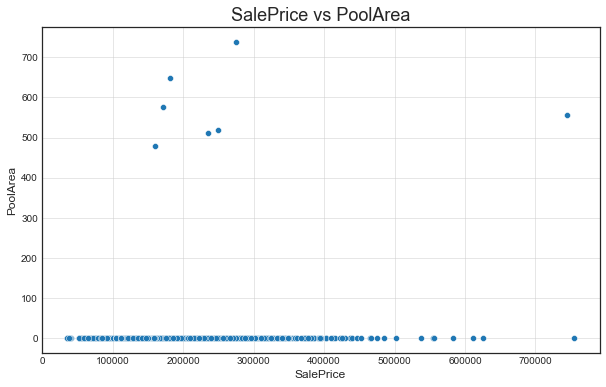

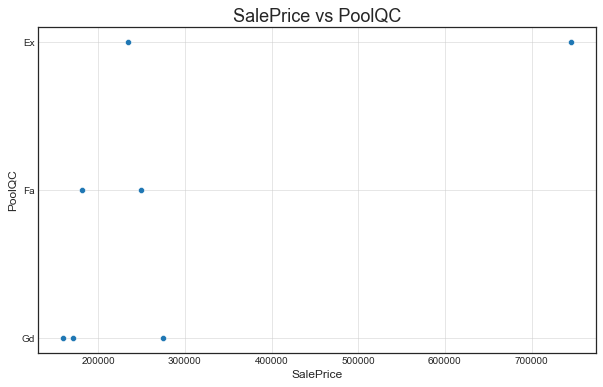

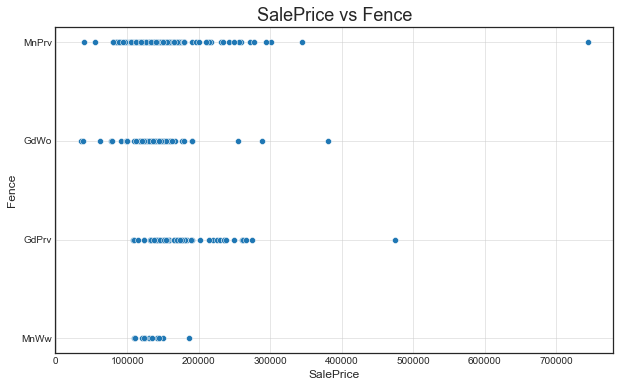

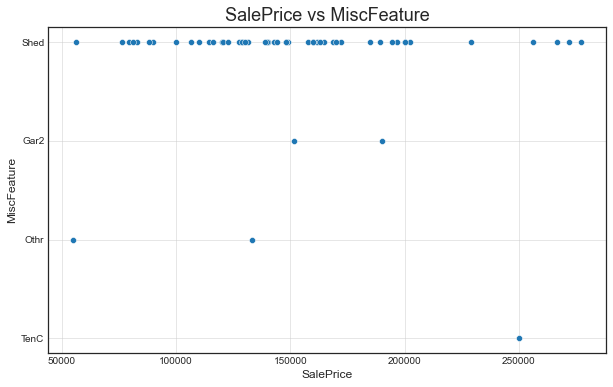

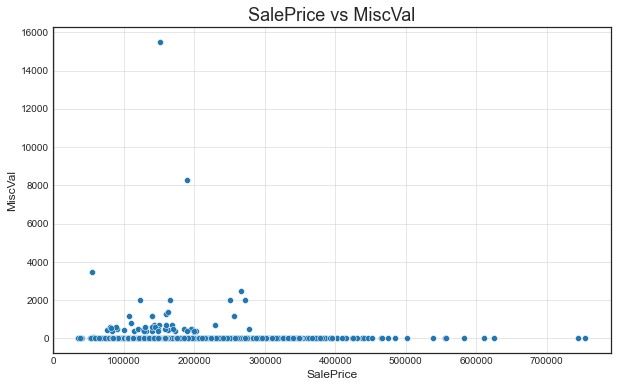

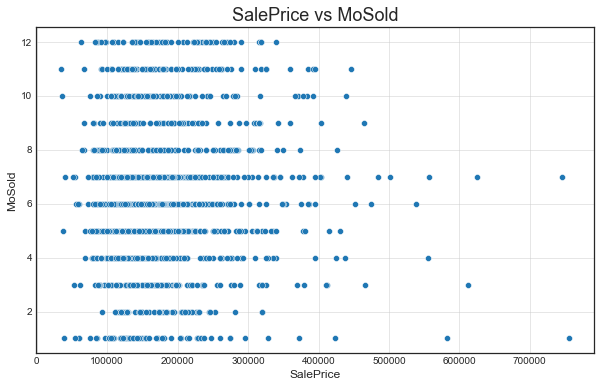

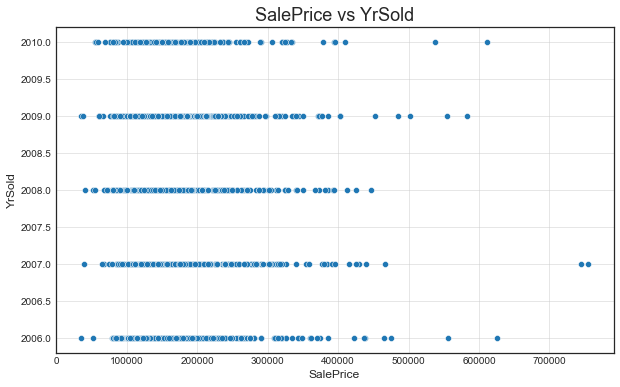

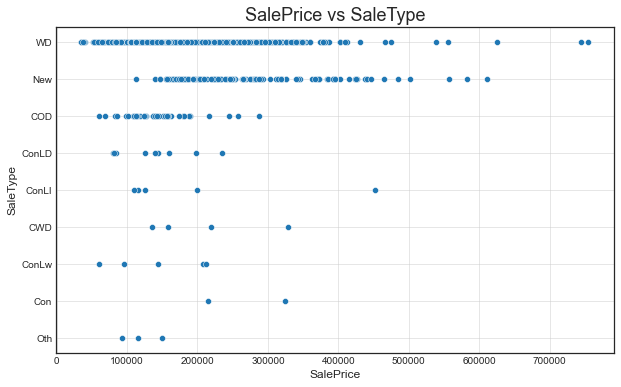

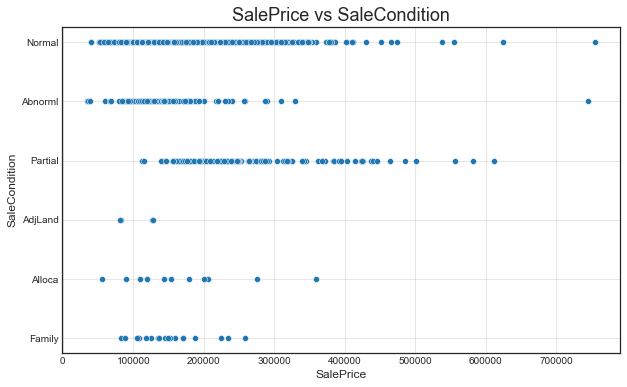

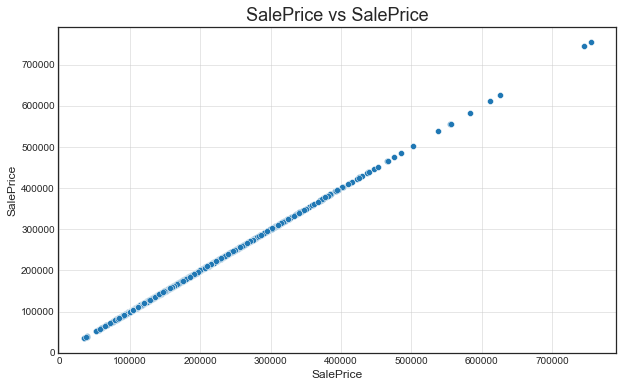

In [7]:
for i in data.columns[:]:
    show_scatterplot(data, 'SalePrice', i, f'SalePrice vs {i}', 'SalePrice', f'{i}')

### EDA

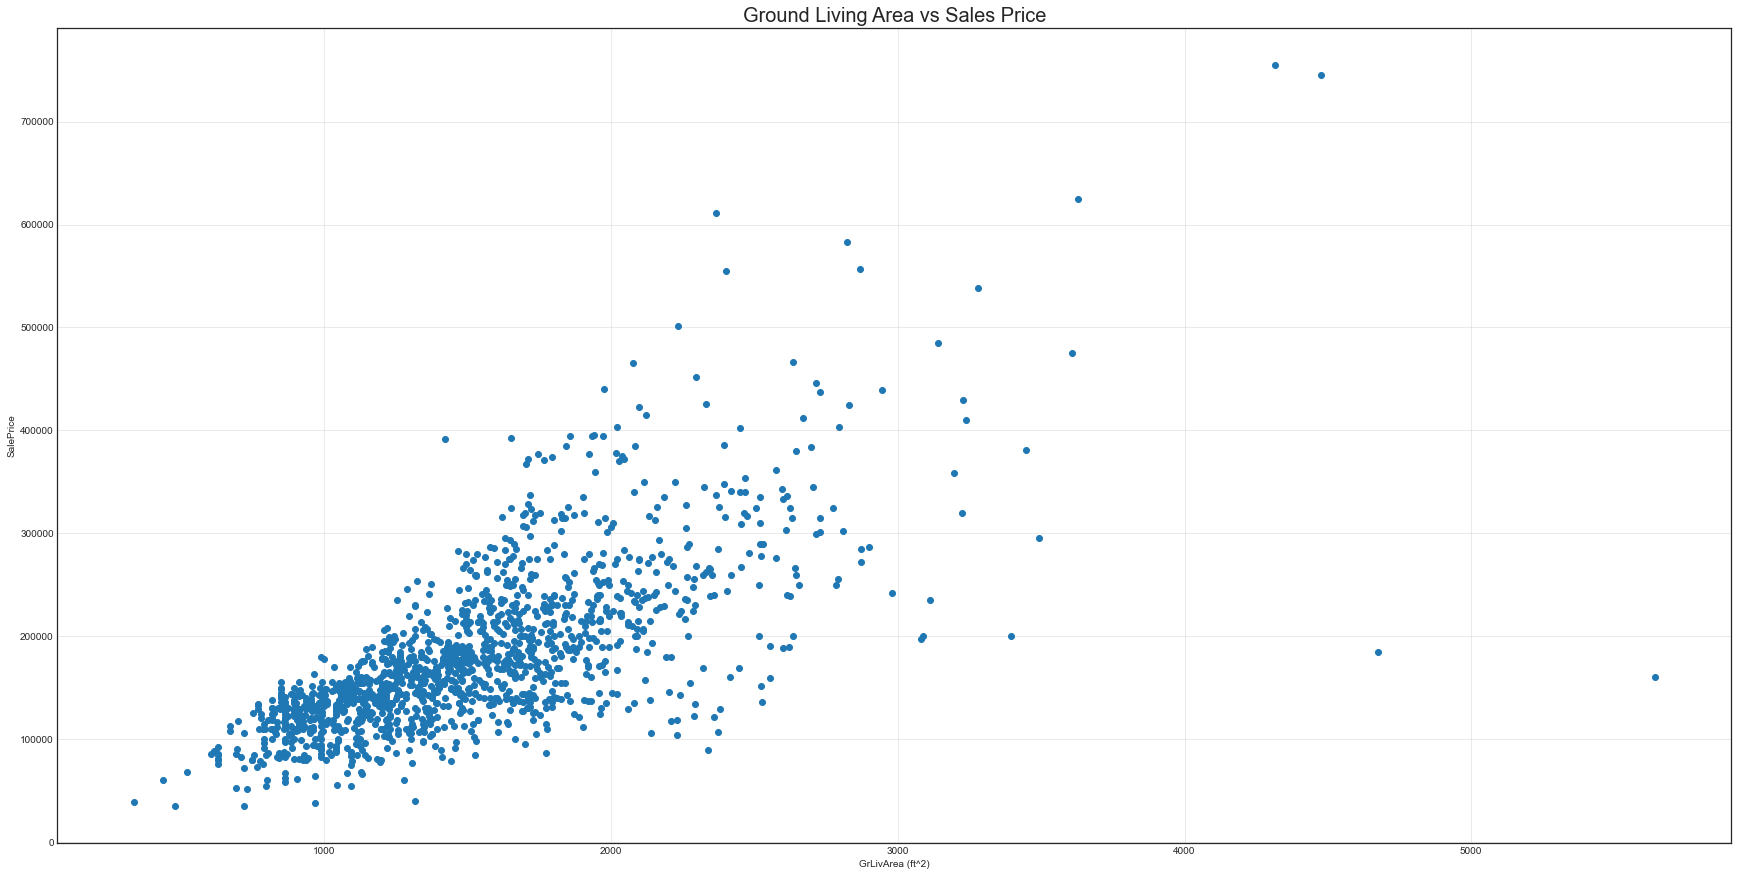

In [8]:
# Check outliers of prices vs living area square feet
fig, ax =plt.subplots(figsize =(30, 15))
ax.scatter(x =data['GrLivArea'], y =data['SalePrice'])

plt.title('Ground Living Area vs Sales Price', fontsize =20)
plt.xlabel('GrLivArea (ft^2)')
plt.ylabel('SalePrice')

plt.grid(alpha =0.5)
plt.show()

- As we can see, higher the area size, higher the sales price of the house. However, there are two data points that seems like outliers. Very high area size with low sales price

In [9]:
# Remove outliers
data =data.drop(data[(data['GrLivArea'] >4000) & (data['SalePrice'] <200000)].index)

In [10]:
price_quant = data.SalePrice.quantile([.25, .5, .75])

In [11]:
price_quant

0.25    129925.0
0.50    163000.0
0.75    214000.0
Name: SalePrice, dtype: float64

In [12]:
# Between 0.25% - 0.50% quantile, there were no house prices so reduced the 0.25% from 129925 -> 110000
data['SalePrice'] =np.where(data['SalePrice'] <=110000, 0, data['SalePrice'])
data['SalePrice'] =np.where((data['SalePrice'] >110000) & (data['SalePrice'] <= 163000), 1, data['SalePrice'])
data['SalePrice'] =np.where((data['SalePrice'] >163000) & (data['SalePrice'] <= 214000), 2, data['SalePrice'])
data['SalePrice'] =np.where(data['SalePrice'] >214000, 3, data['SalePrice'])

In [13]:
data.SalePrice.value_counts()

1    543
2    365
3    362
0    188
Name: SalePrice, dtype: int64

In [14]:
ndata =data.shape[0]
ntest =test_data.shape[0]
y_data =data.SalePrice.values

In [15]:
# Concatenate train & test data for further EDA
data_concat =pd.concat((data, test_data)).reset_index(drop =True)
data_concat.drop(['SalePrice'], axis =1, inplace =True)

In [17]:
# Top 20 features that has missing data in %
data_concat_na = (data_concat.isnull().sum() / len(data_concat)) * 100
data_concat_na = data_concat_na.sort_values(ascending=False)[:20]
data_concat_na.head(20)

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageYrBlt      5.450806
GarageFinish     5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
Functional       0.068564
dtype: float64

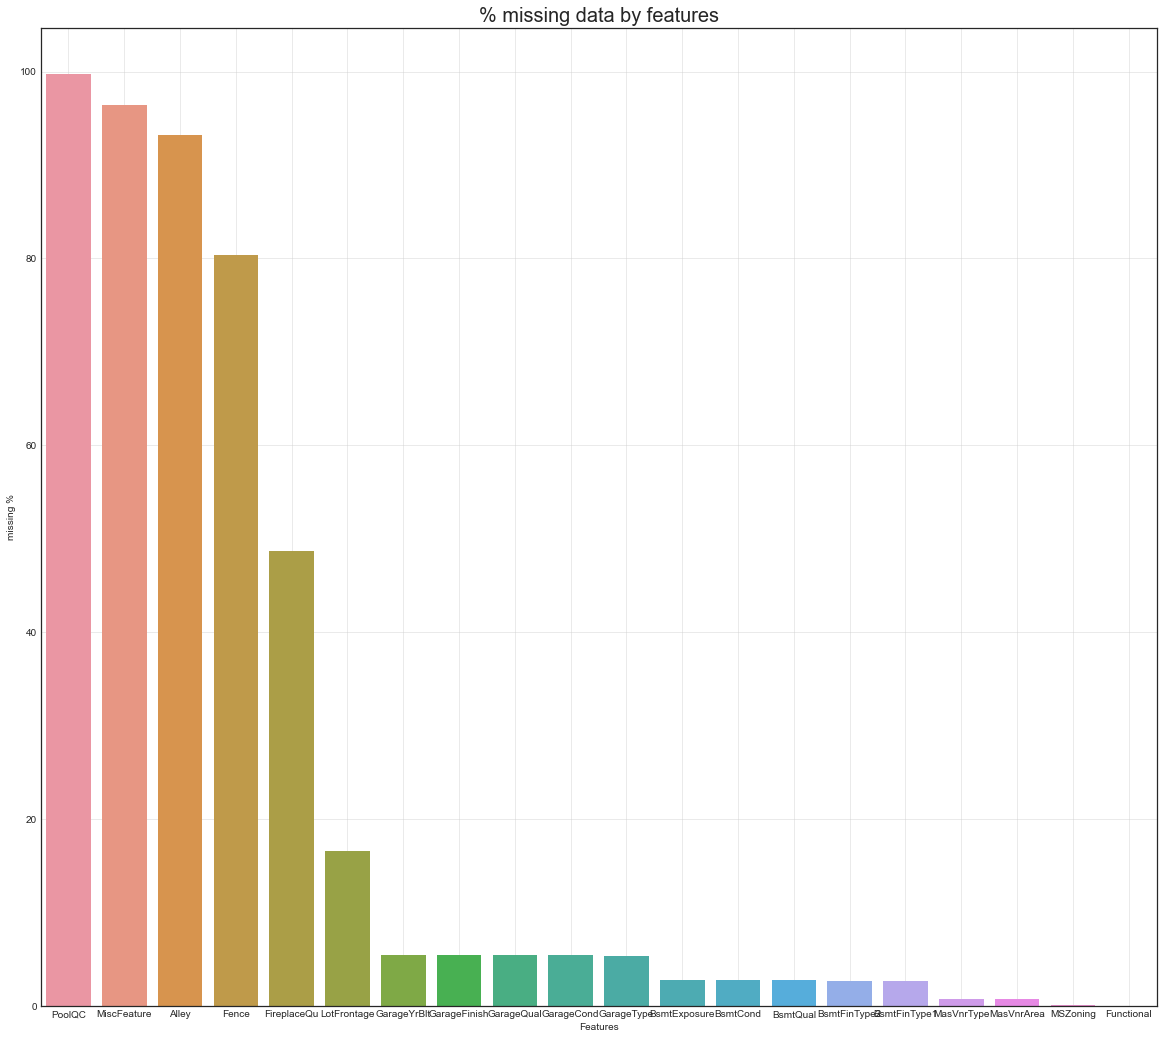

In [18]:
fig, ax =plt.subplots(figsize =(20, 18))
sns.barplot(x =data_concat_na.index, y =data_concat_na)

plt.title('% missing data by features', fontsize =20)
plt.xlabel('Features')
plt.ylabel('missing %')

plt.grid(alpha =0.5)
plt.show()

### Top 5 missing values
- PoolQC: Pool Quality
- MiscFeature: Any ohter miscellaneous features
- Fence: Fence Quality
- Alley: Type of Aleey
- FireplaceQu: Fireplace quality

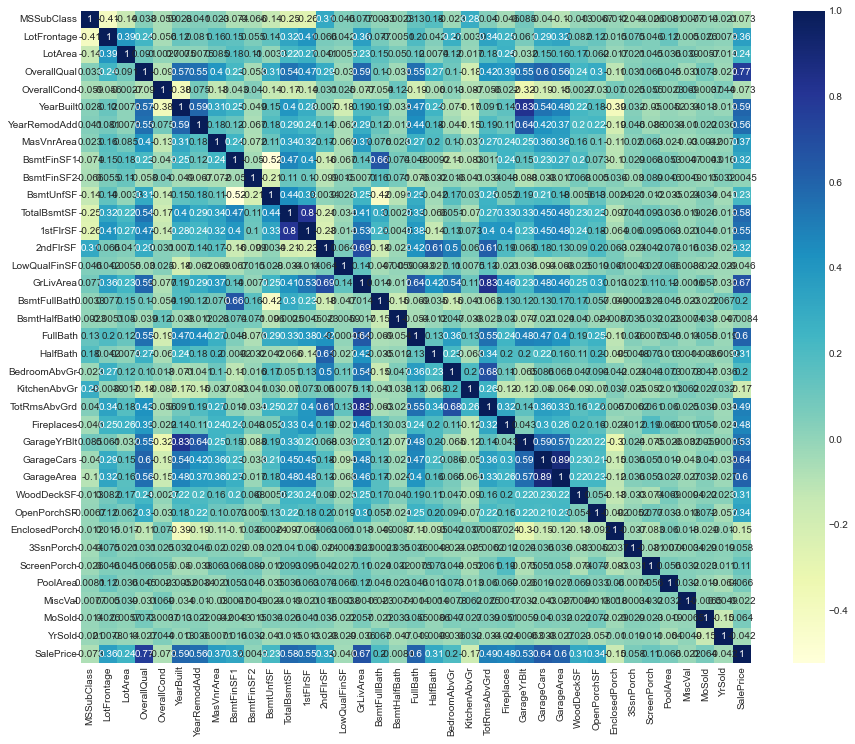

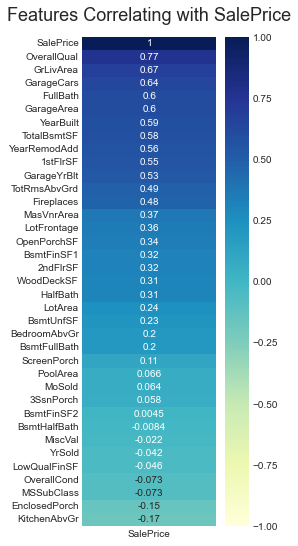

In [95]:
# Data Correlation
corr =data.corr()
plt.figure(figsize =(15, 12))
sns.heatmap(corr, annot =True, cmap="YlGnBu")

# Correlating with target variable
plt.figure(figsize=(3, 9))
heatmap = sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with SalePrice', fontdict={'fontsize':18}, pad=16);

Top 5 Correlation features with SalePrice
1. OverallQual
2. GrLivArea
3. GarageCars
4. FullBath
5. GarageArea

In [22]:
# 34 features with missing values
data_concat_na2 = (data_concat.isnull().sum() / len(data_concat)) * 100
data_concat_na2 = data_concat_na2.sort_values(ascending=False)[:35]
data_concat_na2.head(35)

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageYrBlt      5.450806
GarageFinish     5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
Functional       0.068564
BsmtHalfBath     0.068564
BsmtFullBath     0.068564
Utilities        0.068564
SaleType         0.034282
BsmtFinSF1       0.034282
KitchenQual      0.034282
GarageCars       0.034282
BsmtUnfSF        0.034282
TotalBsmtSF      0.034282
Exterior2nd      0.034282
Exterior1st      0.034282
GarageArea       0.034282
Electrical       0.034282
BsmtFinSF2       0.034282
TotRmsAbvGrd     0.000000
dtype: float64

In [23]:
data_concat_na3 = data_concat.isnull().sum()
data_concat_na3 = data_concat_na3.sort_values(ascending=False)[:35]
data_concat_na3.head(35)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
SaleType           1
BsmtFinSF1         1
KitchenQual        1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
BsmtFinSF2         1
TotRmsAbvGrd       0
dtype: int64

In [24]:
# Adjust missing values

# Features that state as NaN = None e.g. NaN in PoolQC = No pool in the house
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    data_concat[col] =data_concat[col].fillna('None')
    
for col2 in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    data_concat[col2] =data_concat[col2].fillna(0)

#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
data_concat["LotFrontage"] = data_concat.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# 'RL' is most common in MSZoning
data_concat['MSZoning'] = data_concat['MSZoning'].fillna(data_concat['MSZoning'].mode()[0])

# Description states NaN = Typical
data_concat["Functional"] = data_concat["Functional"].fillna("Typ")

# One missing value - Input most common
data_concat['Electrical'] = data_concat['Electrical'].fillna(data_concat['Electrical'].mode()[0])
data_concat['KitchenQual'] = data_concat['KitchenQual'].fillna(data_concat['KitchenQual'].mode()[0])
data_concat['Exterior1st'] = data_concat['Exterior1st'].fillna(data_concat['Exterior1st'].mode()[0])
data_concat['Exterior2nd'] = data_concat['Exterior2nd'].fillna(data_concat['Exterior2nd'].mode()[0])
data_concat['SaleType'] = data_concat['SaleType'].fillna(data_concat['SaleType'].mode()[0])

# Remove unnecessary feature (All the values are same value, 'AllPub', apart from 2 NaN & 1 'NoSeWa')
data_concat = data_concat.drop(['Utilities'], axis=1)

In [25]:
# Check missing values updated
data_concat_na4 = data_concat.isnull().sum()
data_concat_na4 = data_concat_na4.sort_values(ascending=False)[:35]
data_concat_na4.head(5)

MSSubClass      0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
dtype: int64

In [26]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          2917 non-null   object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   LotConfig      2917 non-null   object 
 9   LandSlope      2917 non-null   object 
 10  Neighborhood   2917 non-null   object 
 11  Condition1     2917 non-null   object 
 12  Condition2     2917 non-null   object 
 13  BldgType       2917 non-null   object 
 14  HouseStyle     2917 non-null   object 
 15  OverallQual    2917 non-null   int64  
 16  OverallCond    2917 non-null   int64  
 17  YearBuilt      2917 non-null   int64  
 18  YearRemo

In [27]:
#MSSubClass=The building class
data_concat['MSSubClass'] = data_concat['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
data_concat['OverallCond'] = data_concat['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data_concat['YrSold'] = data_concat['YrSold'].astype(str)
data_concat['MoSold'] = data_concat['MoSold'].astype(str)

In [28]:
# To get the dummy variable with less features, use labelencounter to convert categorical variables with ordering set to numbers
cols =('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    label = LabelEncoder() 
    label.fit(list(data_concat[c].values)) 
    data_concat[c] = label.transform(list(data_concat[c].values))

# shape        
data_concat.shape

(2917, 78)

In [29]:
data_concat_dummy = pd.get_dummies(data_concat)
print(data_concat_dummy.shape)

(2917, 219)


In [30]:
# Get train & test dataset
X =data_concat_dummy[:ndata]
test =data_concat_dummy[ndata:]
y =y_data

In [31]:
print(X.shape)
print(test.shape)
print(y.shape)

(1458, 219)
(1459, 219)
(1458,)


In [32]:
# Split data
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =0.2, random_state =1)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1166, 219)
(292, 219)
(1166,)
(292,)


### Baseline Modelling
- Logistic Regression
- KNN
- SVC
- Decision Tree
- Random Forest
#### Logistic Regression

In [64]:
lr =LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred= lr.predict(X_test)
lr_y_prob= lr.predict_proba(X_test)

In [65]:
model_score = {'Logistic Regression': [],
               'KNN': [],
               'SVC': [],
               'DecisionTree': [],
               'Random Forest': [],
               'Logistic Regression -Bagging': [],
               'KNN -Bagging': [],
               'SVC -Bagging': [],
               'DecisionTree -Bagging': [],
               'Random Forest -Bagging': [],
               'Logistic Regression -Boosting': [],
               'SVC -Boosting': [],
               'DecisionTree -Boosting': [],
               'Random Forest -Boosting': []}

def evaluate_model(model, X_test, y_test, model_name):
    roc_score = metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    preds = model.predict(X_test)
    print(f'Model: {model_name}' )
    print('Model score:', round(model.score(X_test, y_test),2))
    print('----------------------------------------------------------')
    print('ROC_AUC Score:', round(roc_score, 2))
    print('----------------------------------------------------------')
    print('Classification Report:\n')
    print(metrics.classification_report(y_test, preds))
    
    model_score[model_name].append(roc_score)
    model_score[model_name].append(round(model.score(X_test, y_test),2))

In [66]:
evaluate_model(lr, X_test, y_test, 'Logistic Regression')

Model: Logistic Regression
Model score: 0.67
----------------------------------------------------------
ROC_AUC Score: 0.88
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.51      0.56        39
           1       0.65      0.76      0.70       112
           2       0.56      0.53      0.54        70
           3       0.84      0.76      0.80        71

    accuracy                           0.67       292
   macro avg       0.67      0.64      0.65       292
weighted avg       0.67      0.67      0.67       292



- Accuracy score of 0.67 with ROC 0.88. Shows low performance (precision & recall) for class 0 and 2

### KNN

Optimal K of 12


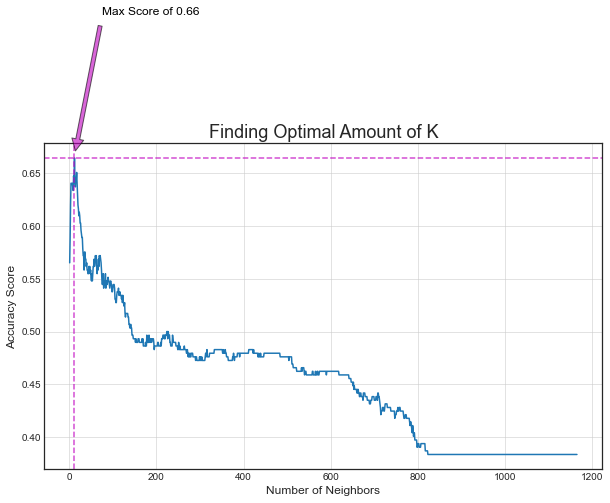

In [67]:
n_neighbors = range(1,len(X_train))
scores = []

# Loop model
for i in n_neighbors:
    knn_tester = KNeighborsClassifier(n_neighbors=i)
    knn_tester.fit(X_train, y_train)
    scores.append(knn_tester.score(X_test, y_test))
    
# Plot   

# Styling
plt.figure(figsize = (10,6))
plt.style.use('seaborn-white')

# Plot
sns.lineplot(x = n_neighbors, y = scores, palette = 'magma')

# Grid
plt.grid(alpha = 0.7)

# Labels
plt.xlabel('Number of Neighbors', fontsize = 12)
plt.ylabel('Accuracy Score', fontsize = 12)
plt.title('Finding Optimal Amount of K', fontsize = 18)

# Annotations
plt.axhline(y = max(scores), color = 'm', linestyle = '--', alpha = 0.7)
plt.axvline(x = scores.index(max(scores))+1, color = 'm', linestyle = '--', alpha = 0.7)

# Annotate max score
plt.annotate(text = f'Max Score of {round(max(scores), 2)}',
             fontsize = 12, color = 'black',
             xy = (scores.index(max(scores)), max(scores)),
             xytext = (75, 0.80),
             arrowprops = dict(facecolor = 'm',
                              shrink = 0.05, alpha = 0.6)
            )

# Show
print(f'Optimal K of {scores.index(max(scores)) + 1}')
plt.show()


In [68]:
# Use optimal K for KNN
knn =KNeighborsClassifier(n_neighbors =12)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, 'KNN')

Model: KNN
Model score: 0.66
----------------------------------------------------------
ROC_AUC Score: 0.85
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.54      0.59        39
           1       0.69      0.66      0.68       112
           2       0.53      0.66      0.59        70
           3       0.79      0.75      0.77        71

    accuracy                           0.66       292
   macro avg       0.67      0.65      0.66       292
weighted avg       0.67      0.66      0.67       292



- Lower accuracy rate than logistic regression model. Show poor score of precision for class 2 and class 0 for recall

### SVC

In [69]:
svm =SVC(probability =True, random_state =42)
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, 'SVC')

Model: SVC
Model score: 0.53
----------------------------------------------------------
ROC_AUC Score: 0.81
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.50      0.95      0.65       112
           2       0.10      0.01      0.02        70
           3       0.71      0.68      0.69        71

    accuracy                           0.53       292
   macro avg       0.33      0.41      0.34       292
weighted avg       0.39      0.53      0.42       292



- Lowest performance comparing to Logistic and KNN. Even gave 0 precision and recall for class 0

### Decision Tree

In [70]:
dt =DecisionTreeClassifier()
params_dt = {'max_leaf_nodes': np.arange(1, 100)}
dt_gs = GridSearchCV(dt, params_dt, cv = 5)
dt_gs.fit(X_train, y_train)
dt_best = dt_gs.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_leaf_nodes=41)


In [71]:
dt =DecisionTreeClassifier(max_leaf_nodes = 56, random_state =42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, 'DecisionTree')

Model: DecisionTree
Model score: 0.75
----------------------------------------------------------
ROC_AUC Score: 0.89
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.49      0.58        39
           1       0.76      0.84      0.80       112
           2       0.68      0.71      0.70        70
           3       0.84      0.80      0.82        71

    accuracy                           0.75       292
   macro avg       0.75      0.71      0.72       292
weighted avg       0.75      0.75      0.75       292



- Show highest accuracy and ROC so far. Also shows good precisoin and recall for all classes

### Random Forest

In [72]:
rf =RandomForestClassifier(random_state =42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, 'Random Forest')

Model: Random Forest
Model score: 0.78
----------------------------------------------------------
ROC_AUC Score: 0.94
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        39
           1       0.74      0.85      0.79       112
           2       0.75      0.66      0.70        70
           3       0.90      0.89      0.89        71

    accuracy                           0.78       292
   macro avg       0.78      0.75      0.76       292
weighted avg       0.78      0.78      0.78       292



- Performed with higest accuracy and ROC comparing to all other models. Good score for precision and recall for all classes

## We will use bagging and boosting method to see whether there are any improvements to our base model

### Bagging

In [73]:
# Logistic Regression
lrbag =BaggingClassifier(base_estimator =lr, random_state =42)
lrbag.fit(X_train, y_train)
evaluate_model(lrbag, X_test, y_test, 'Logistic Regression -Bagging')

Model: Logistic Regression -Bagging
Model score: 0.68
----------------------------------------------------------
ROC_AUC Score: 0.88
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.51      0.56        39
           1       0.67      0.74      0.71       112
           2       0.57      0.59      0.58        70
           3       0.84      0.76      0.80        71

    accuracy                           0.68       292
   macro avg       0.67      0.65      0.66       292
weighted avg       0.68      0.68      0.68       292



In [74]:
# KNN
knnbag =BaggingClassifier(base_estimator =knn, random_state =42)
knnbag.fit(X_train, y_train)
evaluate_model(knnbag, X_test, y_test, 'KNN -Bagging')

Model: KNN -Bagging
Model score: 0.66
----------------------------------------------------------
ROC_AUC Score: 0.86
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.49      0.54        39
           1       0.71      0.64      0.67       112
           2       0.52      0.69      0.59        70
           3       0.79      0.75      0.77        71

    accuracy                           0.66       292
   macro avg       0.66      0.64      0.64       292
weighted avg       0.67      0.66      0.66       292



In [75]:
# SVC
svcbag =BaggingClassifier(base_estimator =svm, random_state =42)
svcbag.fit(X_train, y_train)
evaluate_model(svcbag, X_test, y_test, 'SVC -Bagging')

Model: SVC -Bagging
Model score: 0.53
----------------------------------------------------------
ROC_AUC Score: 0.82
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.33      0.41        39
           1       0.53      0.69      0.60       112
           2       0.30      0.23      0.26        70
           3       0.71      0.70      0.71        71

    accuracy                           0.53       292
   macro avg       0.52      0.49      0.50       292
weighted avg       0.52      0.53      0.52       292



In [76]:
# Decision Tree
dtbag =BaggingClassifier(base_estimator =dt, random_state =42)
dtbag.fit(X_train, y_train)
evaluate_model(dtbag, X_test, y_test, 'DecisionTree -Bagging')

Model: DecisionTree -Bagging
Model score: 0.74
----------------------------------------------------------
ROC_AUC Score: 0.93
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.49      0.59        39
           1       0.73      0.83      0.78       112
           2       0.64      0.67      0.66        70
           3       0.86      0.80      0.83        71

    accuracy                           0.74       292
   macro avg       0.75      0.70      0.71       292
weighted avg       0.74      0.74      0.74       292



In [77]:
# Random Forest
rfbag =BaggingClassifier(base_estimator =rf, random_state =42)
rfbag.fit(X_train, y_train)
evaluate_model(rfbag, X_test, y_test, 'Random Forest -Bagging')

Model: Random Forest -Bagging
Model score: 0.79
----------------------------------------------------------
ROC_AUC Score: 0.94
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.62      0.69        39
           1       0.74      0.87      0.80       112
           2       0.75      0.67      0.71        70
           3       0.94      0.89      0.91        71

    accuracy                           0.79       292
   macro avg       0.80      0.76      0.78       292
weighted avg       0.79      0.79      0.79       292



### Boosting

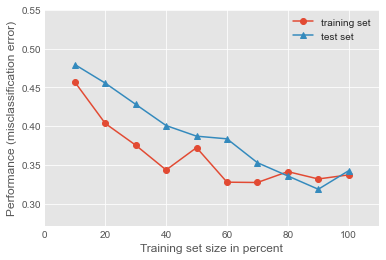

In [78]:
# Logistic Regression
lrboo =AdaBoostClassifier(base_estimator =lr, n_estimators =10, random_state =42)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, lrboo, print_model = False, style = 'ggplot')
plt.show()

In [79]:
evaluate_model(lrboo, X_test, y_test, 'Logistic Regression -Boosting')

Model: Logistic Regression -Boosting
Model score: 0.66
----------------------------------------------------------
ROC_AUC Score: 0.83
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.38      0.46        39
           1       0.64      0.81      0.71       112
           2       0.57      0.46      0.51        70
           3       0.81      0.76      0.78        71

    accuracy                           0.66       292
   macro avg       0.65      0.60      0.62       292
weighted avg       0.65      0.66      0.65       292



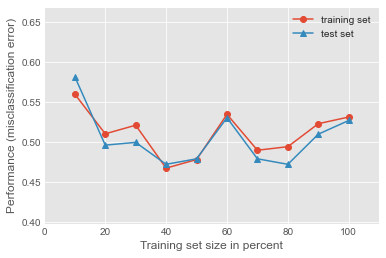

In [80]:
# SVC
svcboo =AdaBoostClassifier(base_estimator =svm, n_estimators =10, random_state =42)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, svcboo, print_model = False, style = 'ggplot')
plt.show()

In [81]:
evaluate_model(svcboo, X_test, y_test, 'SVC -Boosting')

Model: SVC -Boosting
Model score: 0.47
----------------------------------------------------------
ROC_AUC Score: 0.81
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.42      0.95      0.59       112
           2       0.40      0.09      0.14        70
           3       0.96      0.37      0.53        71

    accuracy                           0.47       292
   macro avg       0.45      0.35      0.31       292
weighted avg       0.49      0.47      0.39       292



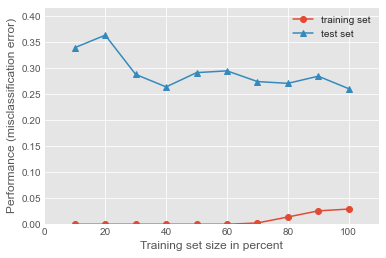

In [82]:
# DecisionTree
dtboo =AdaBoostClassifier(base_estimator =dt, n_estimators =10, random_state =42)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, dtboo, print_model = False, style = 'ggplot')
plt.show()

In [83]:
evaluate_model(dtboo, X_test, y_test, 'DecisionTree -Boosting')

Model: DecisionTree -Boosting
Model score: 0.74
----------------------------------------------------------
ROC_AUC Score: 0.91
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.46      0.57        39
           1       0.72      0.83      0.77       112
           2       0.64      0.76      0.69        70
           3       0.93      0.73      0.82        71

    accuracy                           0.74       292
   macro avg       0.76      0.70      0.71       292
weighted avg       0.76      0.74      0.74       292



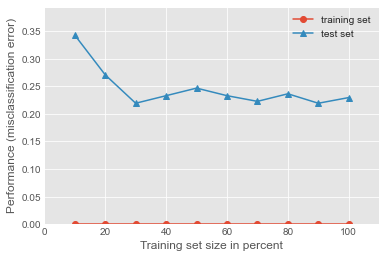

In [84]:
# Random Forest
rfboo =AdaBoostClassifier(base_estimator =rf, n_estimators =10, random_state =42)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, rfboo, print_model = False, style = 'ggplot')
plt.show()

In [85]:
evaluate_model(rfboo, X_test, y_test, 'Random Forest -Boosting')

Model: Random Forest -Boosting
Model score: 0.77
----------------------------------------------------------
ROC_AUC Score: 0.94
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.59      0.65        39
           1       0.73      0.83      0.78       112
           2       0.74      0.66      0.70        70
           3       0.90      0.89      0.89        71

    accuracy                           0.77       292
   macro avg       0.77      0.74      0.75       292
weighted avg       0.77      0.77      0.77       292



In [91]:
model_score

{'Logistic Regression': [0.8783251404342762, 0.67],
 'KNN': [0.8501618904842937, 0.66],
 'SVC': [0.8149116946164737, 0.53],
 'DecisionTree': [0.8853352851375454, 0.75],
 'Random Forest': [0.9417008766906245, 0.78],
 'Logistic Regression -Bagging': [0.8782530131169803, 0.68],
 'KNN -Bagging': [0.8550415276351897, 0.66],
 'SVC -Bagging': [0.8194990595199634, 0.53],
 'DecisionTree -Bagging': [0.9295822630752084, 0.74],
 'Random Forest -Bagging': [0.940487811669815, 0.79],
 'Logistic Regression -Boosting': [0.8333660827189012, 0.66],
 'SVC -Boosting': [0.805428464918425, 0.47],
 'DecisionTree -Boosting': [0.9123861636646546, 0.74],
 'Random Forest -Boosting': [0.9430507839679401, 0.77]}

In [92]:
# Show model comparison
model_scores_df = pd.DataFrame(model_score).T
model_scores_df.rename(columns = {0:'ROC AUC', 1:'Accuracy'}, inplace = True)
round(model_scores_df,2)

,ROC AUC,Accuracy
Logistic Regression,0.88,0.67
KNN,0.85,0.66
SVC,0.81,0.53
DecisionTree,0.89,0.75
Random Forest,0.94,0.78
Logistic Regression -Bagging,0.88,0.68
KNN -Bagging,0.86,0.66
SVC -Bagging,0.82,0.53
DecisionTree -Bagging,0.93,0.74
Random Forest -Bagging,0.94,0.79


- Confusion Matrix for Random Forest -Bagging model

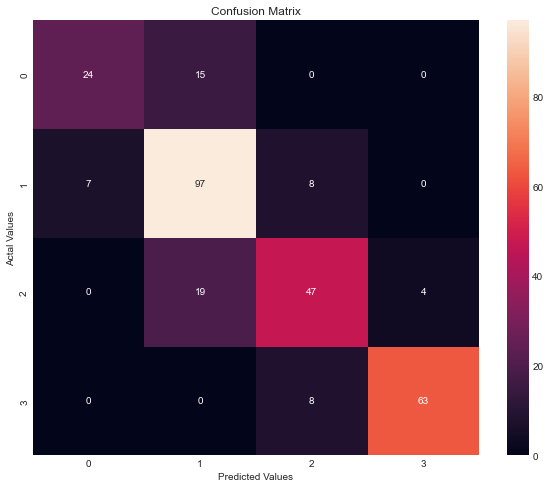

In [94]:
y_pred = rfbag.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Modelling Conclusion
Using various multi-classification modelling, we could see that best perfromed model is random forest -Bagging. Overall, for all models, bagging did improve slightly to the performance of the model. However, it did not show any noticable improvements. For boosting method, mostly it decreased the performance of the model. Only for decison tree there was slight improvement for ROC and precision.
With accuracy of 0.79 with ROC of 0.93, Random forest with bagging shows highest performance.

In [88]:
feature_score =pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending =False)
feature_score_top_10 =feature_score.head(10)
feature_score_top_10

GrLivArea      0.067923
OverallQual    0.049339
1stFlrSF       0.045797
TotalBsmtSF    0.042442
GarageArea     0.040818
YearBuilt      0.039975
GarageYrBlt    0.036658
LotArea        0.029359
BsmtFinSF1     0.025985
ExterQual      0.025959
dtype: float64

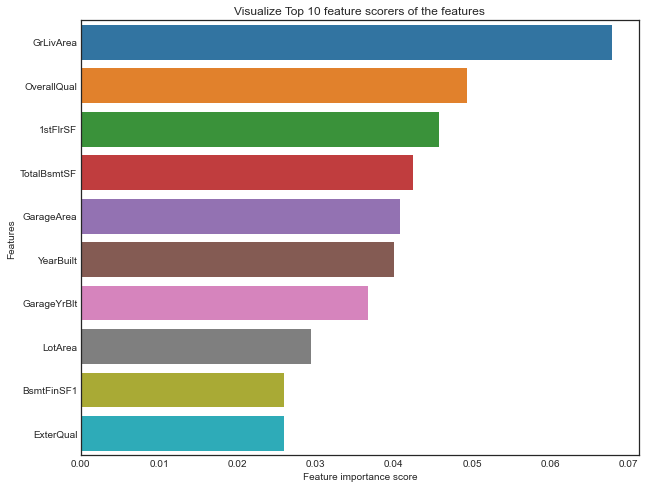

In [89]:
f, ax =plt.subplots(figsize=(10, 8))
ax =sns.barplot(x =feature_score_top_10, y =feature_score_top_10.index)
ax.set_title("Visualize Top 10 feature scorers of the features")
ax.set_xlabel('Feature importance score')
ax.set_ylabel('Features')
plt.show()

- These are top 10 features that scored highest in the feature importance score. This indicates which features are well correlated and influencing when the sale price for a house is decided.
- Overall, the size of the house, basement, garage are features that shows the importance. Also, the quality of materials, the year built are also important features that forms a house.
- Although there are correlation between number of rooms/bathrooms with size of the house, it was interesting to see that these features are not listed in top 10 importance features. Rather than more important factors were the year built of houses, garage size and overall quality of the materials used to build a house.

### Conclusion:
From this project, we have run various different models to build a suitable model to predict the house price range. The model that performed with highest accuracy is random forest with bagging. It shows 0.79 accuracy rate. This accuracy rate is reasonbaly good but there are still room for improvements. Potentially we can improve the model by further optimizing it through parameter adjustment.
Based on the model, there were features that influence more to the house's price range. Some features such as ground living area size, overall quality of materials are strongly correlated with house price. 
In future, in order for this model to be used as practical cases, it is important to consider that as time pass, the trend and feature importance can be change. Also, it is important to continuously improve the dataset by updating latest sales price and features to not only maintain the accuracy but to improve it.